In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

In [2]:
# 훈련된 모델과 데이터를 로드
import pickle
pickle_in = open("5000_1x.pickles","rb")
X=pickle.load(pickle_in)

pickle_in = open("5000_1y.pickles","rb")
y=pickle.load(pickle_in)

dect_model = load_model('5000_test_model.h5')
dect_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [3]:
import cv2

In [4]:
## 예측용 모델
img_size=224
img_array = cv2.imread("Train_Dataset/Closed_Eyes/s0036_00224_1_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

# X_input = np.array(new_array).reshape(1,26 ,34 ,1 )
# X_input.shape

X_input = np.array(new_array).reshape(1,img_size,img_size,3)
X_input.shape

(1, 224, 224, 3)

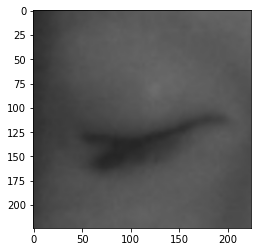

In [5]:
plt.imshow(new_array)

In [6]:
X_input=X_input/255.0

In [7]:
prediction = dect_model.predict(X_input)
prediction

array([[0.00209594]], dtype=float32)

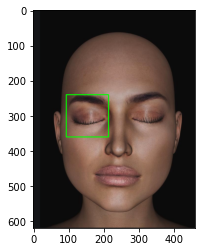

In [8]:
## 임의의 이미지 체크
img = cv2.imread('close3.png')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h)in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
##croping the eyes images-->눈만 짤라내기
eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if(len(eyess)==0):
        print("눈이 감지 되지 않았습니다")
    else : 
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

눈이 감지 되지 않았습니다


(111, 111, 3)

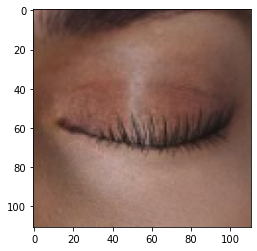

In [10]:
plt.imshow(cv2.cvtColor(eyes_roi , cv2.COLOR_BGR2RGB))
eyes_roi.shape

In [11]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/225.0
final_image.shape
dect_model.predict(final_image)

array([[0.00904495]], dtype=float32)

In [27]:
import time
import winsound
frequncy = 2500 ## 빈도를 2500hz 설정
duration = 1000 ## 울리는 시간은 1초(1000ms)
import numpy as np
import cv2



def check_eyes():
    font = cv2.FONT_HERSHEY_SIMPLEX
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

    cap = cv2.VideoCapture(0) ### 웹캠 체크 ##
    if not cap.isOpened():
        cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        raise IOError("웹캡이 열리지 않았습니다")

    start_time = time.time()
    last_time = time.time()

    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
        # faces = faceCascade.detectMultiScale(gray, 1.1, 4)

        for x,y,w,h in eyes: # 눈 사각형표시
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = frame[y:y+h,x:x+w]
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2) # green
        # for x,y,w,h in faces: # 열굴 사각형표시
            # cv2.rectangle(frame, (x,y), (x+w,y+h), (128, 128, 128), 2) # gray
        
        if len(eyes): # 눈을 뜬 상태이면
            last_time = time.time() # 시간 리셋
            cv2.putText(frame, 'active', (30, 30), font, 0.7, (0,255,0), 2)
            cv2.putText(frame, 'Study Time %.3f' % (time.time() - start_time - 3), (30, 70), font, 0.7, (221, 160, 221), 2)
        else:
            cv2.putText(frame, 'time= %.3f' % (time.time()-last_time), (30, 30), font, 0.7, (0,0,255), 2)

        if time.time() - last_time > 3: # 3초 이상 눈 감으면
            cv2.putText(frame,'Sleep Alert', (30, 60), font, 0.7, (0,0,255), 2)
            cap.release()
            return time.time() - start_time - 3 # 3을빼준이유는 3초간 눈감은시간까지 체크되기때문

        cv2.imshow('Drowsniess Dectection',frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            cap.release()
            return -1

            

result = check_eyes()

if result == -1:
    print('키보드로 끔')
else:
    print('눈 떠있었던(?) 시간 %.3f' % (result))
        
cv2.destroyAllWindows()

눈 떠있었던(?) 시간 2924.537
